In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import celloracle as co
from celloracle.applications import Pseudotime_calculator
from celloracle.applications import Gradient_calculator
from celloracle.applications import Oracle_development_module

In [3]:
adata_big = sc.read("../../h5ad/myeloid_BP2_unintegrated_annotated2.h5ad")
adata_big

AnnData object with n_obs × n_vars = 382320 × 32914
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'unintegrated_clusters', 'seurat_clusters', 'disease.patient', 'celltypes', 'celltypes.disease', 'celltypes.disease.state', 'ident'
    uns: 'X_name'
    obsm: 'PCA', 'UMAP.UNINTEGRATED'
    layers: 'logcounts'

In [4]:
adata_big.X

<382320x32914 sparse matrix of type '<class 'numpy.float64'>'
	with 1165332799 stored elements in Compressed Sparse Column format>

In [5]:
# Saving count data
adata_big.layers["counts"] = adata_big.X.copy()

In [5]:
adata_big.X

<387525x29955 sparse matrix of type '<class 'numpy.float64'>'
	with 1173926732 stored elements in Compressed Sparse Column format>

In [6]:
# Convert 'Sex' and 'Disease.State' to strings and then concatenate them
# adata.obs['celltype_disease'] = adata.obs['celltype'].astype(str) + "_" + adata.obs['disease'].astype(str)

In [5]:
adata_big.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,GEM,prog,disease,sex,pair,age,...,prog_sex,disease_sex,disease.state_sex,unintegrated_clusters,seurat_clusters,disease.patient,celltypes,celltypes.disease,celltypes.disease.state,ident
GEM1_AAACCCAAGACCGCCT-1,SeuratProject,7049.0,2692.0,5.178039,GEM1,HC,HC,F,1.0,58.0,...,F_HC,F_HC,F_HC,1,1,HC_GEM1,Classical,Classical_HC,Classical_HC,1
GEM1_AAACCCAAGAGTGGCT-1,SeuratProject,5247.0,2368.0,4.440633,GEM1,HC,HC,F,1.0,58.0,...,F_HC,F_HC,F_HC,5,5,HC_GEM1,Classical,Classical_HC,Classical_HC,5
GEM1_AAACCCAAGTATCCTG-1,SeuratProject,8063.0,3077.0,4.564058,GEM1,HC,HC,F,1.0,58.0,...,F_HC,F_HC,F_HC,0,0,HC_GEM1,Classical,Classical_HC,Classical_HC,0
GEM1_AAACCCAAGTGAGGTC-1,SeuratProject,15082.0,4290.0,5.523140,GEM1,HC,HC,F,1.0,58.0,...,F_HC,F_HC,F_HC,2,2,HC_GEM1,Nonclassical,Nonclassical_HC,Nonclassical_HC,2
GEM1_AAACCCACAACGCATT-1,SeuratProject,6238.0,2619.0,3.959602,GEM1,HC,HC,F,1.0,58.0,...,F_HC,F_HC,F_HC,5,5,HC_GEM1,Classical,Classical_HC,Classical_HC,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GEM30_TTTGGTTTCACCCTTG-1,SeuratProject,11249.0,3549.0,3.146946,GEM30,progressor,MS,M,7.0,64.2,...,M_progressor,M_MS,M_SP_Progressor,2,2,SP_Progressor_GEM30,Nonclassical,Nonclassical_MS,Nonclassical_Progressor,2
GEM30_TTTGGTTTCCGATTAG-1,SeuratProject,7784.0,3082.0,4.650565,GEM30,progressor,MS,M,7.0,64.2,...,M_progressor,M_MS,M_SP_Progressor,0,0,SP_Progressor_GEM30,Classical,Classical_MS,Classical_Progressor,0
GEM30_TTTGGTTTCGTTCAGA-1,SeuratProject,9920.0,3413.0,3.639113,GEM30,progressor,MS,M,7.0,64.2,...,M_progressor,M_MS,M_SP_Progressor,0,0,SP_Progressor_GEM30,Classical,Classical_MS,Classical_Progressor,0
GEM30_TTTGTTGAGCTCTTCC-1,SeuratProject,13113.0,4051.0,3.690994,GEM30,progressor,MS,M,7.0,64.2,...,M_progressor,M_MS,M_SP_Progressor,0,0,SP_Progressor_GEM30,Classical,Classical_MS,Classical_Progressor,0


In [10]:
adata = adata_big[adata_big.obs['celltypes'].isin(['Classical'])]

In [12]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,GEM,prog,disease,sex,pair,age,...,prog_sex,disease_sex,disease.state_sex,unintegrated_clusters,seurat_clusters,disease.patient,celltypes,celltypes.disease,celltypes.disease.state,ident
GEM1_AAACCCAAGACCGCCT-1,SeuratProject,7049.0,2692.0,5.178039,GEM1,HC,HC,F,1.0,58.0,...,F_HC,F_HC,F_HC,1,1,HC_GEM1,Classical,Classical_HC,Classical_HC,1
GEM1_AAACCCAAGAGTGGCT-1,SeuratProject,5247.0,2368.0,4.440633,GEM1,HC,HC,F,1.0,58.0,...,F_HC,F_HC,F_HC,5,5,HC_GEM1,Classical,Classical_HC,Classical_HC,5
GEM1_AAACCCAAGTATCCTG-1,SeuratProject,8063.0,3077.0,4.564058,GEM1,HC,HC,F,1.0,58.0,...,F_HC,F_HC,F_HC,0,0,HC_GEM1,Classical,Classical_HC,Classical_HC,0
GEM1_AAACCCACAACGCATT-1,SeuratProject,6238.0,2619.0,3.959602,GEM1,HC,HC,F,1.0,58.0,...,F_HC,F_HC,F_HC,5,5,HC_GEM1,Classical,Classical_HC,Classical_HC,5
GEM1_AAACCCACACCAGACC-1,SeuratProject,10480.0,3571.0,3.501908,GEM1,HC,HC,F,1.0,58.0,...,F_HC,F_HC,F_HC,5,5,HC_GEM1,Classical,Classical_HC,Classical_HC,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GEM30_TTTGGTTGTGGCTAGA-1,SeuratProject,6106.0,2630.0,7.238782,GEM30,progressor,MS,M,7.0,64.2,...,M_progressor,M_MS,M_SP_Progressor,0,0,SP_Progressor_GEM30,Classical,Classical_MS,Classical_Progressor,0
GEM30_TTTGGTTTCCGATTAG-1,SeuratProject,7784.0,3082.0,4.650565,GEM30,progressor,MS,M,7.0,64.2,...,M_progressor,M_MS,M_SP_Progressor,0,0,SP_Progressor_GEM30,Classical,Classical_MS,Classical_Progressor,0
GEM30_TTTGGTTTCGTTCAGA-1,SeuratProject,9920.0,3413.0,3.639113,GEM30,progressor,MS,M,7.0,64.2,...,M_progressor,M_MS,M_SP_Progressor,0,0,SP_Progressor_GEM30,Classical,Classical_MS,Classical_Progressor,0
GEM30_TTTGTTGAGCTCTTCC-1,SeuratProject,13113.0,4051.0,3.690994,GEM30,progressor,MS,M,7.0,64.2,...,M_progressor,M_MS,M_SP_Progressor,0,0,SP_Progressor_GEM30,Classical,Classical_MS,Classical_Progressor,0


In [13]:
adata = adata[adata.obs['prog'].isin(['progressor', 'RR'])]

In [10]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

adata = adata[:, adata.var.highly_variable]

In [17]:
# Define the fraction of cells you want to subsample (e.g., 0.5 for 50%)
fraction_to_subsample = 0.25

# Randomly subsample the AnnData object
adata = adata[adata.obs.sample(frac=fraction_to_subsample).index]

In [18]:
adata

View of AnnData object with n_obs × n_vars = 10078 × 32914
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'GEM', 'prog', 'disease', 'sex', 'pair', 'age', 'edss', 'disease.state', 'prog_sex', 'disease_sex', 'disease.state_sex', 'unintegrated_clusters', 'seurat_clusters', 'disease.patient', 'celltypes', 'celltypes.disease', 'celltypes.disease.state', 'ident'
    uns: 'X_name'
    obsm: 'PCA', 'UMAP.UNINTEGRATED'
    layers: 'logcounts', 'counts'

In [13]:
sc.pp.neighbors(adata)

In [19]:
adata.layers['counts'] = adata.X.copy()

In [15]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [16]:
adata.raw = adata

In [22]:
adata.obsm

AxisArrays with keys: PCA, UMAP.UNINTEGRATED, umap

In [21]:
adata.obsm['umap'] = adata.obsm['UMAP.UNINTEGRATED']

In [23]:
pt = Pseudotime_calculator(adata=adata,
                           obsm_key="umap", # Dimensional reduction data name
                           cluster_column_name="prog" # Clustering data name
                           )

In [24]:
adata.obsm['umap']

,umapunintegrated_1,umapunintegrated_2
GEM22_TGCATCCCACGCAGTC-1,-0.403305,-2.592557
GEM2_CCAAGCGCACAGCTTA-1,-1.697512,-0.962845
GEM24_CGTTCTGTCGCTTGAA-1,-1.035270,1.481850
GEM21_GCAGTTATCAAGCCGC-1,-2.747676,0.144376
GEM2_CTGTATTCAGTTTGGT-1,-2.367060,-0.773900
...,...,...
GEM14_ACAGAAAGTTTACGTG-1,-2.801960,-1.946907
GEM10_TGCATCCAGACAACTA-1,-2.025913,-0.901263
GEM12_GTGTCCTTCACTTGTT-1,-4.975409,0.892116
GEM21_CTGCCTACAAAGGCAC-1,-3.029428,-1.221074


In [26]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,GEM,prog,disease,sex,pair,age,...,prog_sex,disease_sex,disease.state_sex,unintegrated_clusters,seurat_clusters,disease.patient,celltypes,celltypes.disease,celltypes.disease.state,ident
GEM22_TGCATCCCACGCAGTC-1,SeuratProject,13512.0,4033.0,3.841030,GEM22,progressor,MS,M,5.0,78.2,...,M_progressor,M_MS,M_SP_Progressor,9,9,SP_Progressor_GEM22,Classical,Classical_MS,Classical_Progressor,9
GEM2_CCAAGCGCACAGCTTA-1,SeuratProject,10759.0,3409.0,3.364625,GEM2,RR,MS,F,1.0,59.2,...,F_RR,F_MS,F_RR,0,0,RR_GEM2,Classical,Classical_MS,Classical_RRMS,0
GEM24_CGTTCTGTCGCTTGAA-1,SeuratProject,6921.0,2728.0,3.149834,GEM24,progressor,MS,M,6.0,61.6,...,M_progressor,M_MS,M_PP_progressor,0,0,PP_progressor_GEM24,Classical,Classical_MS,Classical_PPMS,0
GEM21_GCAGTTATCAAGCCGC-1,SeuratProject,9616.0,3403.0,3.806156,GEM21,RR,MS,M,5.0,73.7,...,M_RR,M_MS,M_RR,0,0,RR_GEM21,Classical,Classical_MS,Classical_RRMS,0
GEM2_CTGTATTCAGTTTGGT-1,SeuratProject,8459.0,3060.0,4.161248,GEM2,RR,MS,F,1.0,59.2,...,F_RR,F_MS,F_RR,5,5,RR_GEM2,Classical,Classical_MS,Classical_RRMS,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GEM14_ACAGAAAGTTTACGTG-1,SeuratProject,14346.0,4300.0,5.269762,GEM14,RR,MS,F,3.0,51.9,...,F_RR,F_MS,F_RR,0,0,RR_GEM14,Classical,Classical_MS,Classical_RRMS,0
GEM10_TGCATCCAGACAACTA-1,SeuratProject,10233.0,3533.0,3.996873,GEM10,progressor,MS,F,3.0,54.4,...,F_progressor,F_MS,F_SP_Progressor,0,0,SP_Progressor_GEM10,Classical,Classical_MS,Classical_Progressor,0
GEM12_GTGTCCTTCACTTGTT-1,SeuratProject,8802.0,3124.0,4.771643,GEM12,progressor,MS,F,3.0,53.2,...,F_progressor,F_MS,F_PP_progressor,1,1,PP_progressor_GEM12,Classical,Classical_MS,Classical_PPMS,1
GEM21_CTGCCTACAAAGGCAC-1,SeuratProject,5380.0,2437.0,5.687732,GEM21,RR,MS,M,5.0,73.7,...,M_RR,M_MS,M_RR,0,0,RR_GEM21,Classical,Classical_MS,Classical_RRMS,0


In [30]:
lineage_dict = {'the_one':adata.obs.celltypes.unique().tolist()}

In [31]:
lineage_dict

{'the_one': ['Classical']}

In [32]:
pt.set_lineage(lineage_dictionary=lineage_dict)
pt.plot_lineages()

InvalidIndexError: (slice(None, None, None), 0)

In [33]:
#picking the cell with the highest x + y value:
coord_sum = adata.obsm['umap'].sum(axis = 1)
max_sum = pd.Series(coord_sum).idxmax()
root_cells = {"the_one": adata.obs_names[max_sum]}

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [24]:
root_cells

{'the_one': 'GEM7_CTCCTCCCACCAAAGG-1'}

In [25]:
pt.set_root_cells(root_cells=root_cells)

The cell, GEM7_CTCCTCCCACCAAAGG-1 in the the_one was not found in your adata. Please make sure the format is correct.


In [26]:
pt.plot_root_cells()

In [27]:
sc.tl.diffmap(pt.adata)

In [28]:
pt.get_pseudotime_per_each_lineage()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [29]:
pt.adata.obs

,nCount_RNA,nFeature_RNA,percent.mt,GEM,unintegrated_clusters,seurat_clusters,celltype,prog,disease,sex,pair,disease.state,prog_sex,disease_sex,disease.state_sex,celltype_disease,celltype_disease.state,the_one
GEM23_TCGAACAAGGCATGCA-1,7043.0,2699.0,5.537413,GEM23,1,1,Classical,RRMS,MS,M,6.0,RRMS,M_RRMS,M_MS,M_RRMS,Classical_MS,Classical_RRMS,False
GEM12_GTGATGTCACTCCCTA-1,6724.0,2575.0,5.502677,GEM12,1,1,Classical,Progressor,MS,F,3.0,PPMS,F_Progressor,F_MS,F_PPMS,Classical_MS,Classical_PPMS,False
GEM26_GGGTATTGTTAGGGAC-1,8984.0,3009.0,2.949688,GEM26,4,4,Classical,Progressor,MS,F,7.0,PPMS,F_Progressor,F_MS,F_PPMS,Classical_MS,Classical_PPMS,False
GEM18_TGATTCTAGTGATAAC-1,7361.0,2812.0,4.741204,GEM18,5,5,Classical,Progressor,MS,M,4.0,Progressor,M_Progressor,M_MS,M_Progressor,Classical_MS,Classical_Progressor,False
GEM23_GCCCAGATCTCTGCCA-1,4383.0,1975.0,3.604837,GEM23,0,0,Classical,RRMS,MS,M,6.0,RRMS,M_RRMS,M_MS,M_RRMS,Classical_MS,Classical_RRMS,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GEM17_TCGAAGTCAAGAGAGA-1,8465.0,3105.0,4.961607,GEM17,5,5,Classical,RRMS,MS,M,4.0,RRMS,M_RRMS,M_MS,M_RRMS,Classical_MS,Classical_RRMS,False
GEM22_ATTATCCGTTAGTTCG-1,6664.0,2738.0,9.063625,GEM22,8,8,Classical,Progressor,MS,M,5.0,Progressor,M_Progressor,M_MS,M_Progressor,Classical_MS,Classical_Progressor,False
GEM5_AGCTTCCGTTTCACTT-1,9868.0,3218.0,3.992704,GEM5,4,4,Classical,RRMS,MS,F,2.0,RRMS,F_RRMS,F_MS,F_RRMS,Classical_MS,Classical_RRMS,False
GEM27_GTAATCGGTTTCGGCG-1,4887.0,2118.0,3.028443,GEM27,0,0,Classical,Progressor,MS,M,7.0,PPMS,M_Progressor,M_MS,M_PPMS,Classical_MS,Classical_PPMS,False


In [30]:
base_GRN = co.data.load_human_promoter_base_GRN()

Loading prebuilt promoter base-GRN. Version: hg19_gimmemotifsv5_fpr2


In [31]:
base_GRN

,peak_id,gene_short_name,9430076C15RIK,AC002126.6,AC012531.1,AC226150.2,AFP,AHR,AHRR,AIRE,...,ZNF784,ZNF8,ZNF816,ZNF85,ZSCAN10,ZSCAN16,ZSCAN22,ZSCAN26,ZSCAN31,ZSCAN4
0,chr10_100027907_100029007,LOXL4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr10_100154964_100156064,MIR1287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chr10_100174878_100175978,PYROXD2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chr10_100191017_100192117,MIR4685,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr10_100205078_100206178,LOC101927278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36998,chrY_9558805_9559905,TTTY21B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36999,chrY_9572895_9573995,TTTY2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
37000,chrY_9611828_9612928,TTTY1B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37001,chrY_9637762_9638862,TTTY22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
adata.X = adata.layers['counts'].copy()

In [33]:
oracle = co.Oracle()

In [34]:
oracle.import_anndata_as_raw_count(adata = adata, cluster_column_name = 'prog', embedding_name = 'umap')

In [35]:
adata.X.max()

7.805253505706787

In [36]:
oracle.import_TF_data(TF_info_matrix=base_GRN)

In [37]:
oracle.perform_PCA()

In [38]:
# Select important PCs
plt.plot(np.cumsum(oracle.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
plt.show()
print(n_comps)
n_comps = min(n_comps, 50)

14


In [39]:
n_cell = oracle.adata.shape[0]
print(f"cell number is :{n_cell}")

cell number is :43138


In [40]:
k = int(0.025*n_cell)
print(f"Auto-selected k is :{k}")


Auto-selected k is :1078


In [41]:
oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=28)

In [42]:
adata.obs['prog']

GEM23_TCGAACAAGGCATGCA-1          RRMS
GEM12_GTGATGTCACTCCCTA-1    Progressor
GEM26_GGGTATTGTTAGGGAC-1    Progressor
GEM18_TGATTCTAGTGATAAC-1    Progressor
GEM23_GCCCAGATCTCTGCCA-1          RRMS
                               ...    
GEM17_TCGAAGTCAAGAGAGA-1          RRMS
GEM22_ATTATCCGTTAGTTCG-1    Progressor
GEM5_AGCTTCCGTTTCACTT-1           RRMS
GEM27_GTAATCGGTTTCGGCG-1    Progressor
GEM22_GCGGATCGTCAAGTTC-1    Progressor
Name: prog, Length: 43138, dtype: category
Categories (2, object): ['Progressor', 'RRMS']

In [43]:
%%time

links = oracle.get_links(cluster_name_for_GRN_unit="prog", alpha=10,
                         verbose_level=10)

  0%|          | 0/2 [00:00<?, ?it/s]

Inferring GRN for Progressor...


  0%|          | 0/2746 [00:00<?, ?it/s]

Inferring GRN for RRMS...


  0%|          | 0/2746 [00:00<?, ?it/s]

CPU times: user 2min 37s, sys: 15.9 s, total: 2min 53s
Wall time: 10min 41s


In [44]:
links.filter_links(p=0.001, weight="coef_abs", threshold_number=10000) #10k is default top num to keep

In [45]:
links.plot_degree_distributions(plot_model=True)

Progressor
RRMS


In [46]:
links.get_network_score()

In [47]:
links.merged_score

,degree_all,degree_centrality_all,degree_in,degree_centrality_in,degree_out,degree_centrality_out,betweenness_centrality,eigenvector_centrality,cluster
POU2F1,93,0.064718,9,0.006263,84,0.058455,5480.0,0.227930,Progressor
H3F3B,6,0.004175,6,0.004175,0,0.000000,0.0,0.158236,Progressor
NFATC3,125,0.086987,6,0.004175,119,0.082811,4126.0,0.231240,Progressor
SMAD1,232,0.161447,0,0.000000,232,0.161447,0.0,0.498945,Progressor
H3F3A,17,0.011830,17,0.011830,0,0.000000,0.0,0.610703,Progressor
...,...,...,...,...,...,...,...,...,...
ARMH1,1,0.000704,1,0.000704,0,0.000000,0.0,0.003769,RRMS
RNF144A,1,0.000704,1,0.000704,0,0.000000,0.0,0.004912,RRMS
MAN2A2,1,0.000704,1,0.000704,0,0.000000,0.0,0.004093,RRMS
RMDN2,1,0.000704,1,0.000704,0,0.000000,0.0,0.002448,RRMS


In [48]:
links.plot_scores_as_rank(cluster="RRMS", n_gene=30)

In [49]:
links.plot_score_comparison_2D(value="eigenvector_centrality",
                               cluster1="RRMS", cluster2="Progressor",
                               percentile=98)
plt.show()

In [50]:
import matplotlib.pyplot as plt

In [52]:
# fig, ax = plt.subplots(figsize=[6, 6])
links.plot_score_comparison_2D(value="eigenvector_centrality",
                               cluster1="RRMS", cluster2="Progressor",
                               percentile=98,
                              save="classical_eigenvector_centrality_score_comparison.pdf")
# plt.show()
# plt.savefig('plot_score_comparison_2D.pdf', dpi = 300)

In [54]:
links.plot_score_per_cluster(goi="EGR3")

EGR3


In [69]:
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(alpha=10, use_cluster_specific_TFdict=True)

ValueError: Clustering unit does not match. Please prepare links object that was made with same cluster data.

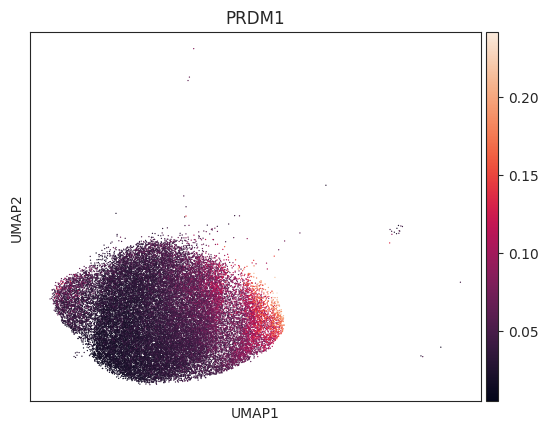

In [75]:
sc.pl.umap(oracle.adata, color = ['PRDM1'], layer="imputed_count",
          save='PRDM1_classical_featureplot.pdf')
# plt.savefig('EGR3_classical_featureplot.pdf', dpi = 300)

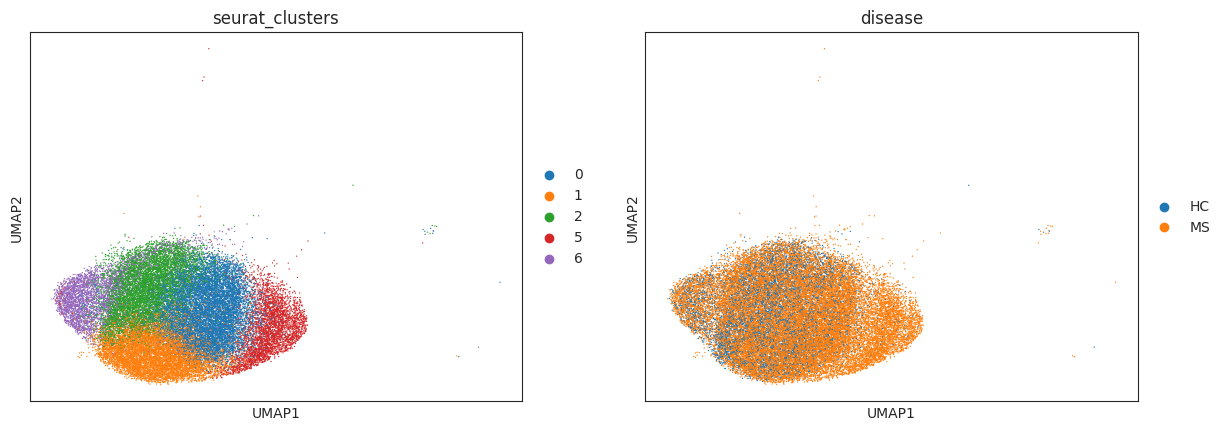

In [69]:
sc.pl.umap(adata, color=["seurat_clusters", 'disease'], use_raw=False,
          save='clusters_classical.pdf')